**Prediksi Berita Palsu Dengan Menggunakan Algoritma LSTM**

Library yang digunakan yaitu:

- pandas: digunakan untuk memuat dan memanipulasi data.

- numpy: digunakan untuk operasi matematika pada data.

- matplotlib: digunakan untuk membuat visualisasi data.

- seaborn: digunakan untuk membuat visualisasi data yang lebih menarik.

- sklearn: digunakan untuk membagi data menjadi data pelatihan dan data pengujian.

- keras: digunakan untuk membangun model LSTM.

- tensorflow: digunakan untuk mengubah data menjadi format yang dapat diproses oleh model LSTM.

Link sumber:

- https://medium.com/@dhea.larasati326/multivariate-long-short-term-memory-dengan-python-c7170f443bd9

- https://ichi.pro/id/buat-perkiraan-menggunakan-python-lstm-29380549582991

- https://openlibrarypublications.telkomuniversity.ac.id/index.php/engineering/article/view/14318

- https://dqlab.id/top-4-library-python-untuk-machine-learning

- https://lms.onnocenter.or.id/wiki/index.php/Keras:_5_Step_Life-Cycle_for_Long_Short-Term_Memory_Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


a) Import Library

In [ ]:
#Melakukan Import Library Yang Dibutuhkan Dalam Melakukan Prediksi Dengan Menggunakan
#Algoritma LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

b) Load Dataset

In [ ]:
#Membuat Variabel "path" yang berisikan dimana dataset disimpan pada drive
path = "/content/drive/MyDrive/datasets/BDDM-5/final-projek/news.csv"

In [ ]:
#Membaca dataset dari variabel path yang menunjukkan lokasi dataset news.csv
df = pd.read_csv(path)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


c) EDA

In [ ]:
#Menampilkan seluruh informasi yang ada pada dataset news.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


d) Preprocessing data (Feature selection)

In [ ]:
#Melakukan Feature Selection
df = df[['title', 'text', 'label']]
df.dropna(inplace=True)
#Dengan menggunakan data antara FAKE(Palsu) dan REAL(Asli)
df['label'] = df['label'].map({'FAKE': 1, 'REAL': 0})

df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


e) Spliting data

In [ ]:
#Melakukan Spliting Data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

f) Pembuatan model

In [ ]:
#Membuat Model Data dengan max featuresnya 5000 dan panjang pada X_trainnya 200 dan X_testnya 200
max_features = 5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train, maxlen=200)
X_test = tokenizer.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test, maxlen=200)

In [ ]:
#embed_dim merupakan dimensi embeding yang digunakan untuk mengubah kata-kata menjadi numerik.
embed_dim = 128
#lstm_out merupakan jumlah unit dalam lapisan LSTM. Semakin banyak unit, semakin kompleks model dan semakin lama waktu pelatihan.
lstm_out = 196

model = Sequential()
#Menambahkan lapisan embedding ke model. Lapisan ini mengubah kata-kata menjadi vektor numerik.
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
#Mengompilasi model dengan fungsi loss categorical_crossentropy, optimizer adam, dan metrik akurasi.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Menampilkan hasil ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 895194 (3.41 MB)
Trainable params: 895194 (3.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#batch_size adalah jumlah sampel yang akan digunakan dalam satu iterasi. Semakin besar nilai batch_size, semakin cepat waktu pelatihan, tetapi semakin sedikit memori yang tersedia.
batch_size = 32
# epochs adalah jumlah iterasi yang akan dilakukan pada seluruh data pelatihan. Semakin banyak iterasi, semakin baik model yang dihasilkan, tetapi semakin lama waktu pelatihan.
epochs = 7

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
history = model.fit(X_train, to_categorical(y_train), validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[early_stop])

Epoch 1/7
127/127 [==============================] - 183s 1s/step - loss: 0.6021 - accuracy: 0.6729 - val_loss: 0.4266 - val_accuracy: 0.8018
Epoch 2/7
127/127 [==============================] - 178s 1s/step - loss: 0.3282 - accuracy: 0.8616 - val_loss: 0.3373 - val_accuracy: 0.8728
Epoch 3/7
127/127 [==============================] - 176s 1s/step - loss: 0.1891 - accuracy: 0.9275 - val_loss: 0.3846 - val_accuracy: 0.8432
Epoch 4/7
127/127 [==============================] - 186s 1s/step - loss: 0.1153 - accuracy: 0.9583 - val_loss: 0.4250 - val_accuracy: 0.8274
Epoch 5/7
127/127 [==============================] - 182s 1s/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.5491 - val_accuracy: 0.8373
Epoch 5: early stopping


g) Hasil model

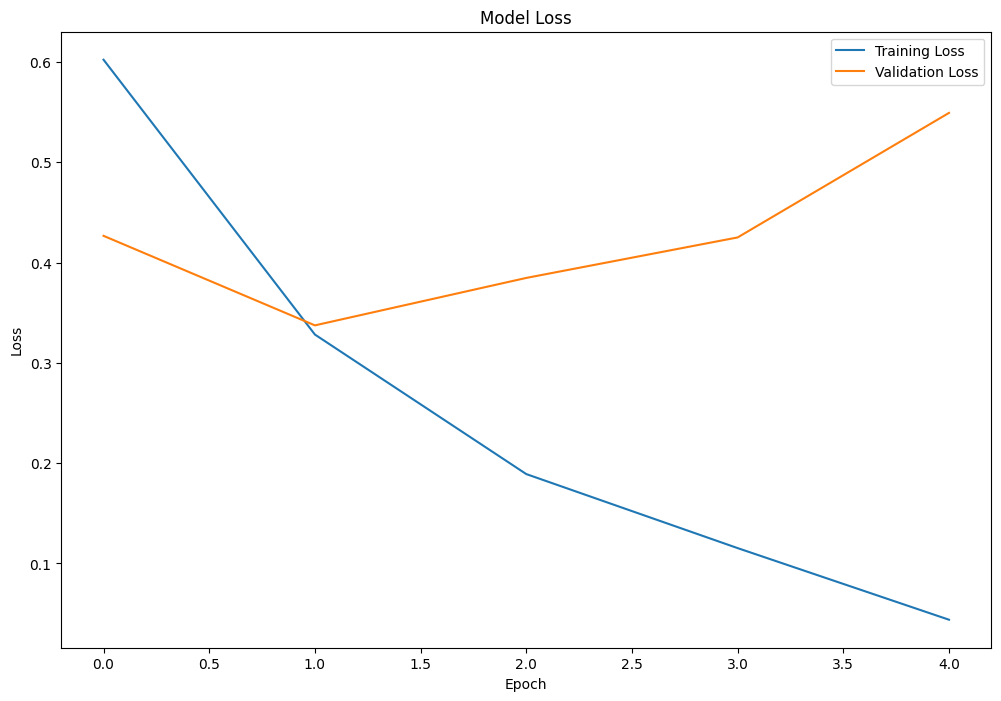

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

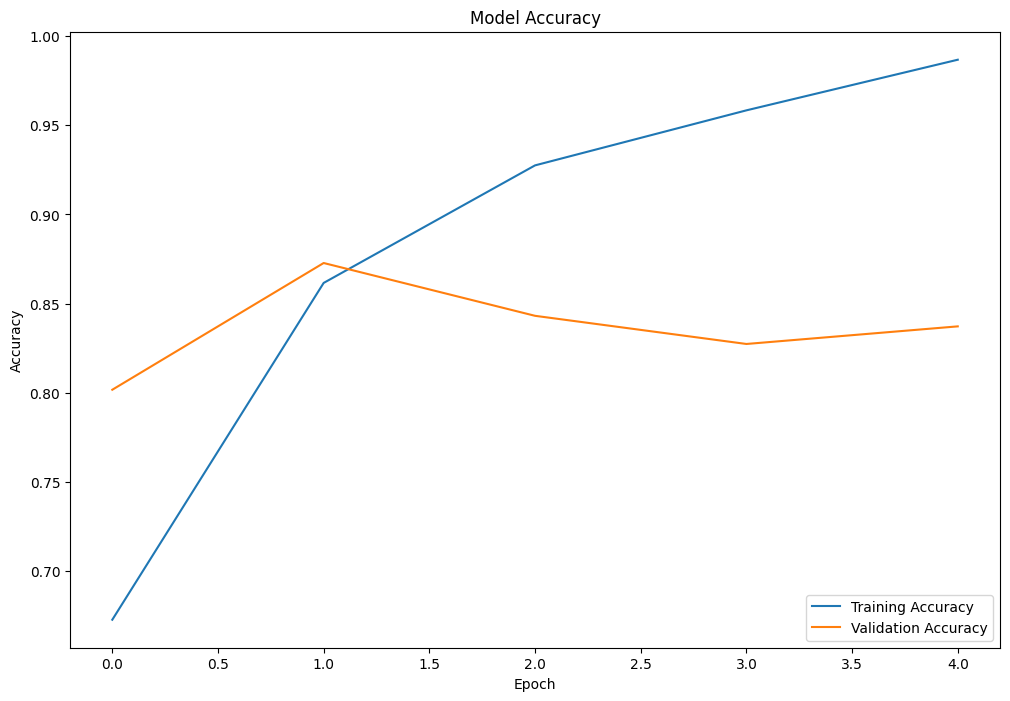

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

h) Evaluasi model

In [ ]:
score, acc = model.evaluate(X_test, to_categorical(y_test), verbose=1, batch_size=batch_size)
print("Accuracy: %.2f%%" % (acc*100))

40/40 [==============================] - 8s 204ms/step - loss: 0.5567 - accuracy: 0.8469
Accuracy: 84.69%
